In [1]:
path_antoine = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/"
path_results_antoine = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/Results/"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [ ]:
from Tool_Functions.cleaning_data import *
from Tool_Functions.join_data import *
from Tool_Functions.test_comportment_reabo import *
from Tool_Functions.visual import *
from Tool_Functions.comportment_reabo import *

In [ ]:
scaler = StandardScaler()

In [5]:
new_df = file_to_dataframe(path_antoine + 'new_datas_diff_%.csv')
df = new_df.drop(columns = ['NB_APPARITIONS', 'MOY_DELAI'])

In [ ]:
df_original = pd.DataFrame(df).set_index('ID_ABONNE')
columns_names = df_original.columns
columns_names

In [7]:
# Supposons que df est votre DataFrame et qu'il contient des valeurs 'inf'
# Remplacer 'inf' par NaN pour le traitement ultérieur
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
# Séparer la colonne ID_ABONNE
df_id = df[['ID_ABONNE']].copy()

# Séparer les données à normaliser (sans la colonne ID_ABONNE)
df_to_scale = df.drop(columns=['ID_ABONNE'])


In [9]:

# Mise à l'échelle des données sans ID_ABONNE
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_to_scale.fillna(0)), columns=df_to_scale.columns)

# Concaténation de la colonne ID_ABONNE avec les données normalisées
df_scaled = pd.concat([df_id, df_scaled], axis=1)
df_scaled[np.isnan(df)] = -3

In [11]:
df_scaled

,ID_ABONNE,Autres_n_REABOS,ODD 15 jours EV+_n_REABOS,ODD 15 jours TC_n_REABOS,ODD 21 jours TC_n_REABOS,ODD 30 jours EV+_n_REABOS,ODD 30 jours TC_n_REABOS,ODD 7 jours autre que SG_n_REABOS,Semaine genéreuse_n_REABOS,Autres_MEAN_TIME_DIFF,ODD 15 jours EV+_MEAN_TIME_DIFF,ODD 15 jours TC_MEAN_TIME_DIFF,ODD 21 jours TC_MEAN_TIME_DIFF,ODD 30 jours EV+_MEAN_TIME_DIFF,ODD 30 jours TC_MEAN_TIME_DIFF,ODD 7 jours autre que SG_MEAN_TIME_DIFF,Semaine genéreuse_MEAN_TIME_DIFF
0,50402221602,-0.217105,-0.455025,-0.623109,-0.506478,-0.561681,8.422211,-0.231045,-1.627077,-3.0,-3.000000,0.367307,-3.00000,-3.0,-0.102994,-3.0,-3.000000
1,50402223202,-0.217105,-0.455025,-0.927357,-0.506478,-0.561681,1.368771,-0.231045,1.022017,-3.0,-3.000000,0.296734,-3.00000,-3.0,-0.042067,-3.0,0.413703
2,50402224003,-0.217105,-0.455025,-0.118926,-0.506478,-0.561681,-0.471256,-0.231045,0.955233,-3.0,-3.000000,0.301071,-3.00000,-3.0,-3.000000,-3.0,0.410070
3,50402230202,-0.217105,-0.455025,0.259211,-0.506478,-0.561681,1.752110,-0.231045,-0.120729,-3.0,-3.000000,0.282319,-3.00000,-3.0,0.030416,-3.0,0.392867
4,50402230203,-0.217105,-0.455025,0.398525,-0.126578,-0.561681,1.635091,-0.231045,-0.437855,-3.0,-3.000000,0.292602,-0.41083,-3.0,0.215546,-3.0,0.221546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777139,53186931901,-0.217105,3.922559,-0.623109,-0.506478,-0.561681,-0.471256,-0.231045,-0.120729,-3.0,0.044462,0.274587,-3.00000,-3.0,-3.000000,-3.0,0.459616
777140,53186937201,-0.217105,3.922559,-0.623109,-0.506478,-0.561681,-0.471256,-0.231045,-0.120729,-3.0,0.044462,0.274587,-3.00000,-3.0,-3.000000,-3.0,0.459616
777141,53186971001,-0.217105,3.922559,-0.623109,-0.506478,-0.561681,-0.471256,-0.231045,-0.120729,-3.0,0.044462,0.274587,-3.00000,-3.0,-3.000000,-3.0,0.459616
777142,53186977101,-0.217105,3.922559,-0.623109,-0.506478,-0.561681,-0.471256,-0.231045,-0.120729,-3.0,0.086532,0.297767,-3.00000,-3.0,-3.000000,-3.0,0.400999


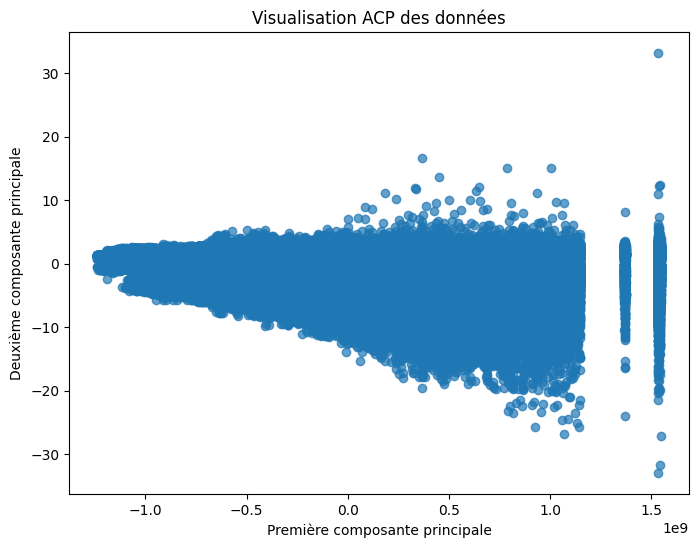

In [12]:
pca = PCA(n_components=2)  # Réduction à 2 dimensions pour la visualisation
df_pca = pca.fit_transform(df_scaled)

# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.7)
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Visualisation ACP des données')
plt.show()

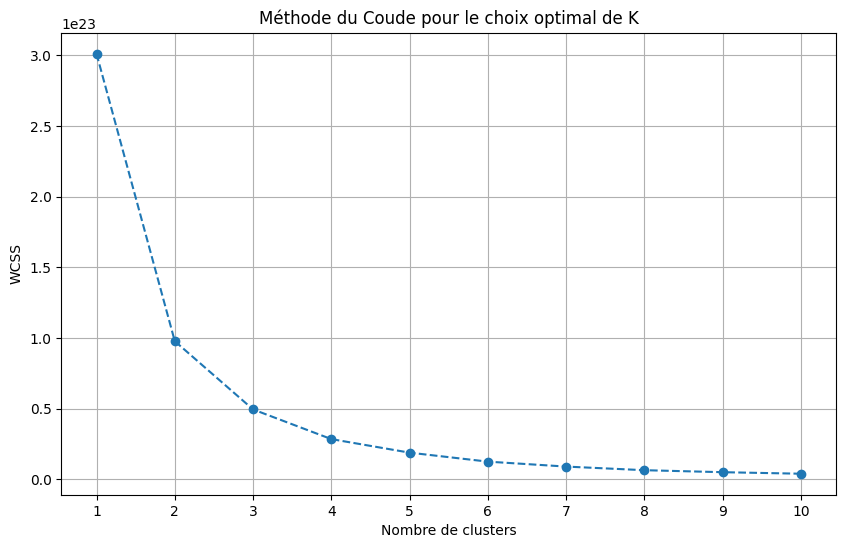

In [28]:
wcss = []
for i in range(1, 11):  # Test de 1 à 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Affichage de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Méthode du Coude pour le choix optimal de K')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 2


/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 3


/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 4


/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 5


/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 6


/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 7


/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 8


/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 9


/Users/antoine/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Score calculé pour k = 10


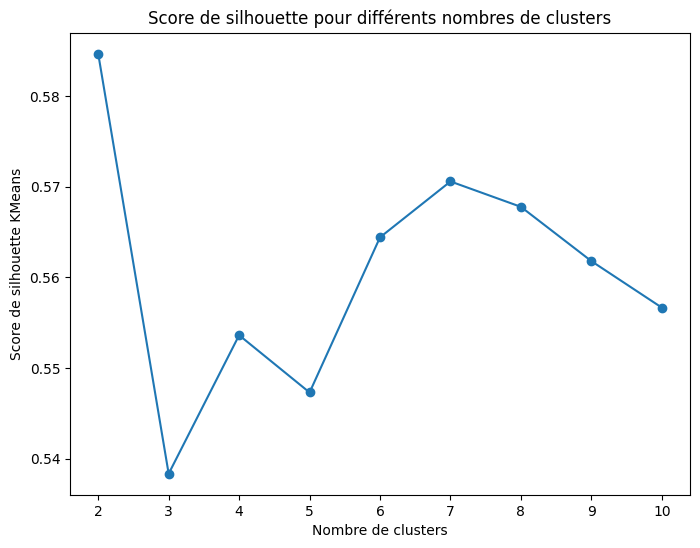

In [13]:
np.random.seed(42)
indices = np.random.choice(range(len(df_scaled)), size=int(len(df_scaled) * 0.1), replace=False)
sample = df_scaled.iloc[indices]
silhouette_scores = []

for k in range(2, 11):  # Testez des valeurs de k de 2 à 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sample)
    score = silhouette_score(sample, kmeans.labels_)
    silhouette_scores.append(score)
    print('Score calculé pour k =', k)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette KMeans')
plt.title('Score de silhouette pour différents nombres de clusters')
plt.show()

In [12]:
# Initialiser le modèle KMeans avec un nombre déterminé de clusters
kmeans = KMeans(n_clusters=7) 
kmeans.fit(df_scaled)
clusters = kmeans.labels_

Hyperparamètres : 
init : Méthode d'initialisation des centroïdes. Les options courantes sont 'k-means++' (défaut), 'random', un tableau donné de formes (n_clusters, n_features) ou une méthode d'initialisation personnalisée. 'k-means++' choisit les centroïdes initiaux pour le clustering k-means d'une manière qui accélère la convergence.

n_init : Nombre de fois où l'algorithme k-means sera exécuté avec différentes graines de centroïde. Les résultats finaux seront la meilleure sortie de n_init exécutions consécutives en termes d'inertie.

max_iter : Le nombre maximal d'itérations de l'algorithme k-means pour une seule exécution.
tol : Tolérance pour déclarer la convergence. Si les changements dans les centroïdes sont inférieurs à cette tolérance, l'algorithme peut arrêter plus tôt.

precompute_distances : Détermine si les distances entre les points doivent être précalculées ou calculées à la volée. Cela peut accélérer les choses mais peut aussi consommer beaucoup de mémoire pour les grands ensembles de données.
verbose : Mode verbeux.

random_state : Graine utilisée par le générateur de nombres aléatoires pour l'initialisation du centroïde ou si init est une graine pour l'algorithme k-means++.

copy_x : Si True (par défaut), les données d'entrée sont copiées, sinon elles peuvent être écrasées pendant le clustering.

algorithm : Choix de l'algorithme pour calculer les k-moyens parmi 'auto', 'full' ou 'elkan'. Le choix classique 'full' est l'algorithme EM pour le k-means. 'elkan' est une variante plus efficace qui est plus rapide sur les ensembles de données avec de nombreux clusters mais qui ne fonctionne pas avec des métriques autres que la distance euclidienne.

In [17]:
df['Cluster_KMeans'] = kmeans.labels_

In [18]:
compte = df.groupby('Cluster_KMeans').count()
compte

In [26]:

centroids = kmeans.cluster_centers_
centroids
# Convertir les centroïdes en DataFrame pour une meilleure lisibilité
centroids_df = pd.DataFrame(centroids, columns=columns_names)
# Afficher les centroïdes
print(centroids_df)
save_to_csv_file(centroids_df, path_antoine + 'centres_clusters.csv')


   Autres_n_REABOS  ODD 15 jours EV+_n_REABOS  ODD 15 jours TC_n_REABOS  \
0     5.101813e+10                  -0.058004                 -0.146590   
1     5.236554e+10                   0.086174                  0.022356   
2     5.171085e+10                  -0.029484                 -0.189596   
3     5.282246e+10                   0.047598                  0.415458   
4     5.042276e+10                  -0.072294                 -0.280357   
5     5.137233e+10                  -0.038261                 -0.187879   
6     5.204202e+10                  -0.041443                  0.019077   

   ODD 21 jours TC_n_REABOS  ODD 30 jours EV+_n_REABOS  \
0                 -0.254798                  -0.109508   
1                  0.118086                   0.092409   
2                 -0.082010                   0.101613   
3                  0.361889                  -0.292004   
4                 -0.277733                  -0.140961   
5                 -0.186002                  -0.009

In [ ]:
df_scaled_df = pd.DataFrame(df_scaled, columns=columns_names)
df_scaled_df['Cluster_KMeans'] = kmeans.labels_
k = 7
for i in range(k):
    print(f"Cluster {i} characteristics:")
    cluster_data = df_scaled_df[df_scaled_df['Cluster_KMeans'] == i]
    # Vous pouvez ici calculer des statistiques ou des graphiques pour comprendre chaque cluster
    print(cluster_data.describe())  # Résumé statistique
    save_to_csv_file(cluster_data.describe(), path_antoine + 'cluster_data.csv')